<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-Experiment" data-toc-modified-id="Create-an-Experiment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create an Experiment</a></span><ul class="toc-item"><li><span><a href="#Run-GROMACS-FDA" data-toc-modified-id="Run-GROMACS-FDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run GROMACS FDA</a></span></li></ul></li><li><span><a href="#Parsing-PFA-File" data-toc-modified-id="Parsing-PFA-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parsing PFA File</a></span><ul class="toc-item"><li><span><a href="#Averaged-Parsing" data-toc-modified-id="Averaged-Parsing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Averaged Parsing</a></span></li></ul></li><li><span><a href="#Curvature" data-toc-modified-id="Curvature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Curvature</a></span></li><li><span><a href="#Cluster" data-toc-modified-id="Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster</a></span></li><li><span><a href="#Force" data-toc-modified-id="Force-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Force</a></span></li><li><span><a href="#MSD-and-Diffusion" data-toc-modified-id="MSD-and-Diffusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MSD and Diffusion</a></span></li><li><span><a href="#Framewise-parsing-of-PFA" data-toc-modified-id="Framewise-parsing-of-PFA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Framewise parsing of PFA</a></span></li></ul></div>

In [ ]:
from pyLFDA import LFDA
from PIL import Image

# Create an Experiment
the `LFDA()` class is central in running analysis on your simulations. \
\
Arguments:
-   `experiment_name` : Name of the experiment. Uses this to create a directory to store outputs in. If not specified time-stamp of experiment will be used.
-   `pdb_filename` : Path of the PDB file to be used.
-   `gro_filename` : Path of the GRO file to be used.
-   `trr_filename` : Path of the TRR file to be used.
-   `tpr_filename` : Path of the TPR file to be used.
-   `ndx_filename` : Path of the NDX file to be used.
-   `gfda_version` : Version of Gromacs FDA to be used. Creates a directory with the name to store it and uses it for further experiments. Currently, we support these cersions only - ['v2020.4-fda2.10.2', 'v2020.3-fda2.10.1', 'v2020.3-fda2.10', 'v2020-fda2.10', 'v2019.3-fda2.9.1', 'v2018.7-fda2.9.1']. 

In [2]:
#To do analysis, first we create an LFDA() object.
#It stores all files required to do the experiment.
#The argument names are self explanatory.
experiment = LFDA(experiment_name="example_run", trr_filename="../testfiles/step7_1.trr", tpr_filename="../testfiles/step7_1.tpr", ndx_filename="../testfiles/step7_1.ndx", pdb_filename="../testfiles/step7_1.pdb", gro_filename="../testfiles/step7_1.gro", gfda_version="v2019.3-fda2.9.1")

Making MDA Universe from PDB and TRR file


/home/bhavay/anaconda3/envs/myenv/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


Parsing GRO file to calculate numbers of atoms, atoms information and box vectors
/mnt/c/Users/bhava/Desktop/work/lfda/testfiles/step7_1.gro file parsed. with 106628 atoms in 0.33794355392456055 seconds


## Run GROMACS FDA
`run_fda()` create `.pfi` file and then generating a PFA file using GROMACS FDA. \
 \
 Arguments : 
   -   `group1` : 1st group selected
   -   `group2` : 2nd group selected
   -   `residue_list` : [group1, group2]
   -   `pfi_filename` : Name of the PFI file to be generated. It is inferred from the experiment class if None.
   -   `pfa_filename` : Name of the PFA file to be generated. It is inferred from the experiment class if None.

In [3]:
#Run GROMACS FDA to calculate pairwise forces.
#This command creates a .pfa file containing pairwise forces between atoms.
experiment.run_fda(group1="POPS", group2="POPC", residue_list=["POPS", "POPC"], pfa_filename="pfa_file.pfa")

Creating PFI file
/mnt/c/Users/bhava/Desktop/work/lfda/L-FDA/example_run/pfi_Oct-20-2021_1920.pfi file created in 0.0007569789886474609 seconds 
Running Gromacs FDA
GMX RUN completed in 787.3816373348236 seconds
/mnt/c/Users/bhava/Desktop/work/lfda/L-FDA/example_run/pfa_file.pfa PFA file is generated in /mnt/c/Users/bhava/Desktop/work/lfda/L-FDA/example_run


In [4]:
#Running GROMACS FDA can be a time consuming process.
#If you want to continue experimenting on a .pfa file you had previously generated.
#you can just load it and continue working.
#you dont need to run `run_fda()` if you load your .pfa file.
experiment.load_pfa(pfa_filename="example_run/pfa_file.pfa", group1="POPS", group2="POPC", residue_list=["POPS", "POPC"])

Loading PFA file generated by Gromacs FDA


# Parsing PFA File
The `.pfa` file generated by GROMACS FDA is parsed for further analyses. The file can be parsed in two ways depending on your use case. 
 - `Average Parsing` - Allows for calculation of averaged properties over all frames. set `mode` argument to `average`.
 - `Framewise Parsing` - Allows for calculation of either properties for a specific frame or for a moving window over all frames. set `mode` argument to `framewise`.


## Averaged Parsing

In [5]:
#The .pfa file created, is parsed as average or framewise.
experiment.framewise=False #we specify that we need to parse pfa as average.
experiment.parse_pfa(file_name="generated_pfa_average.pfa")

Parsing PFA file as average
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/L-FDA/example_run/generated_pfa_average.pfa created with 106628 atoms in 704.4216163158417 seconds
PFA file parsed in 0.30233335494995117 seconds


In [ ]:
#Parsing .pfa can also be time consuming.
#You can just load the parsed .pfa to continue experimenting.
#The generated pfa file should be parsed as average to further parse it as average and similarly for framewise.
#using this function in "average" mode automatically sets "experiment.framewise" to "False".
experiment.parse_parsed_pfa(file_name="example_run/generated_pfa_average.pfa", mode="average", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

# Curvature 
This function generates curvature plots using MDAnalysis and displays them along with pairwise forces of the selected groups and the angle they make with the z-axis. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.
 - `num_x_bins`: (int) Number of bins in x-direction. default: 10.
 - `num_y_bins`: (int) Number of bins in y-direction. default: 10.
 - `split`: (bool) Split Calculations into Upper and Lower Membranes. default: False

In [7]:
#Generate curavture plots
experiment.curvature()

Creating curvature plot


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up


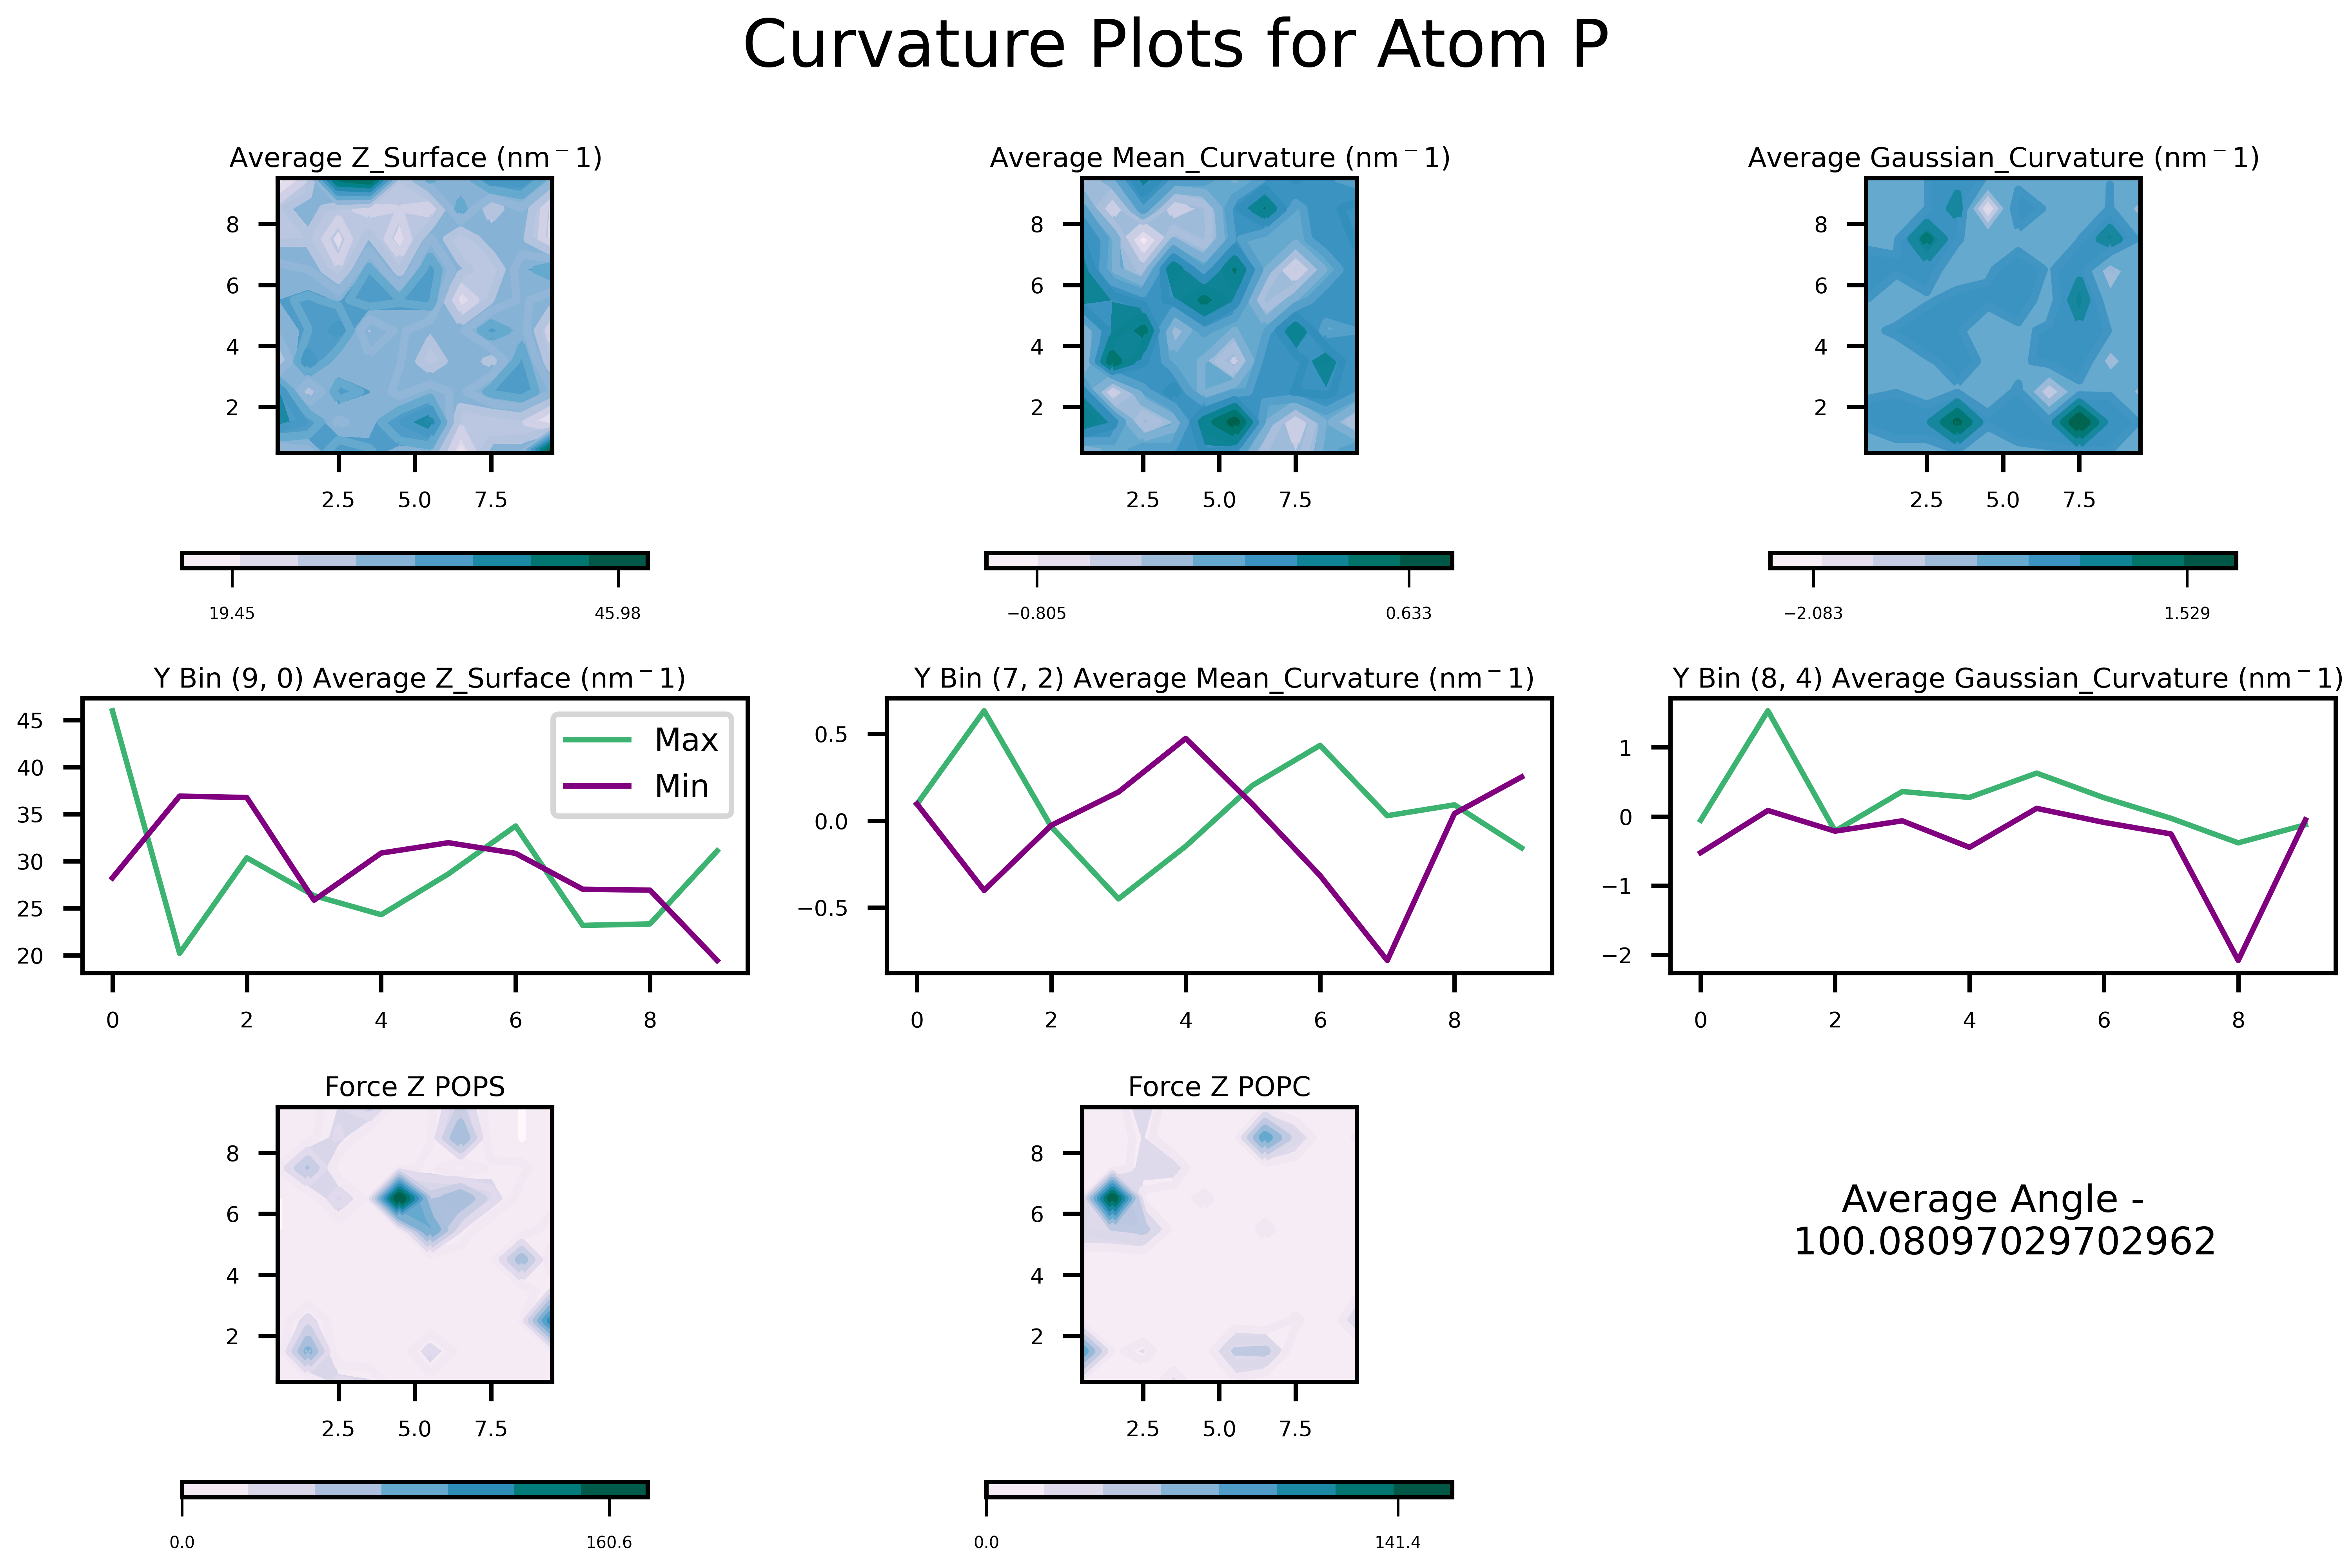

In [8]:
#visualise curvature plots
img = Image.open('example_run/curvature_averaged_10_10_P.png')
img.show()

In [9]:
#Splitting the curavture into upper and lower membrane.
experiment.curvature(split=True)

Creating curvature plot


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up


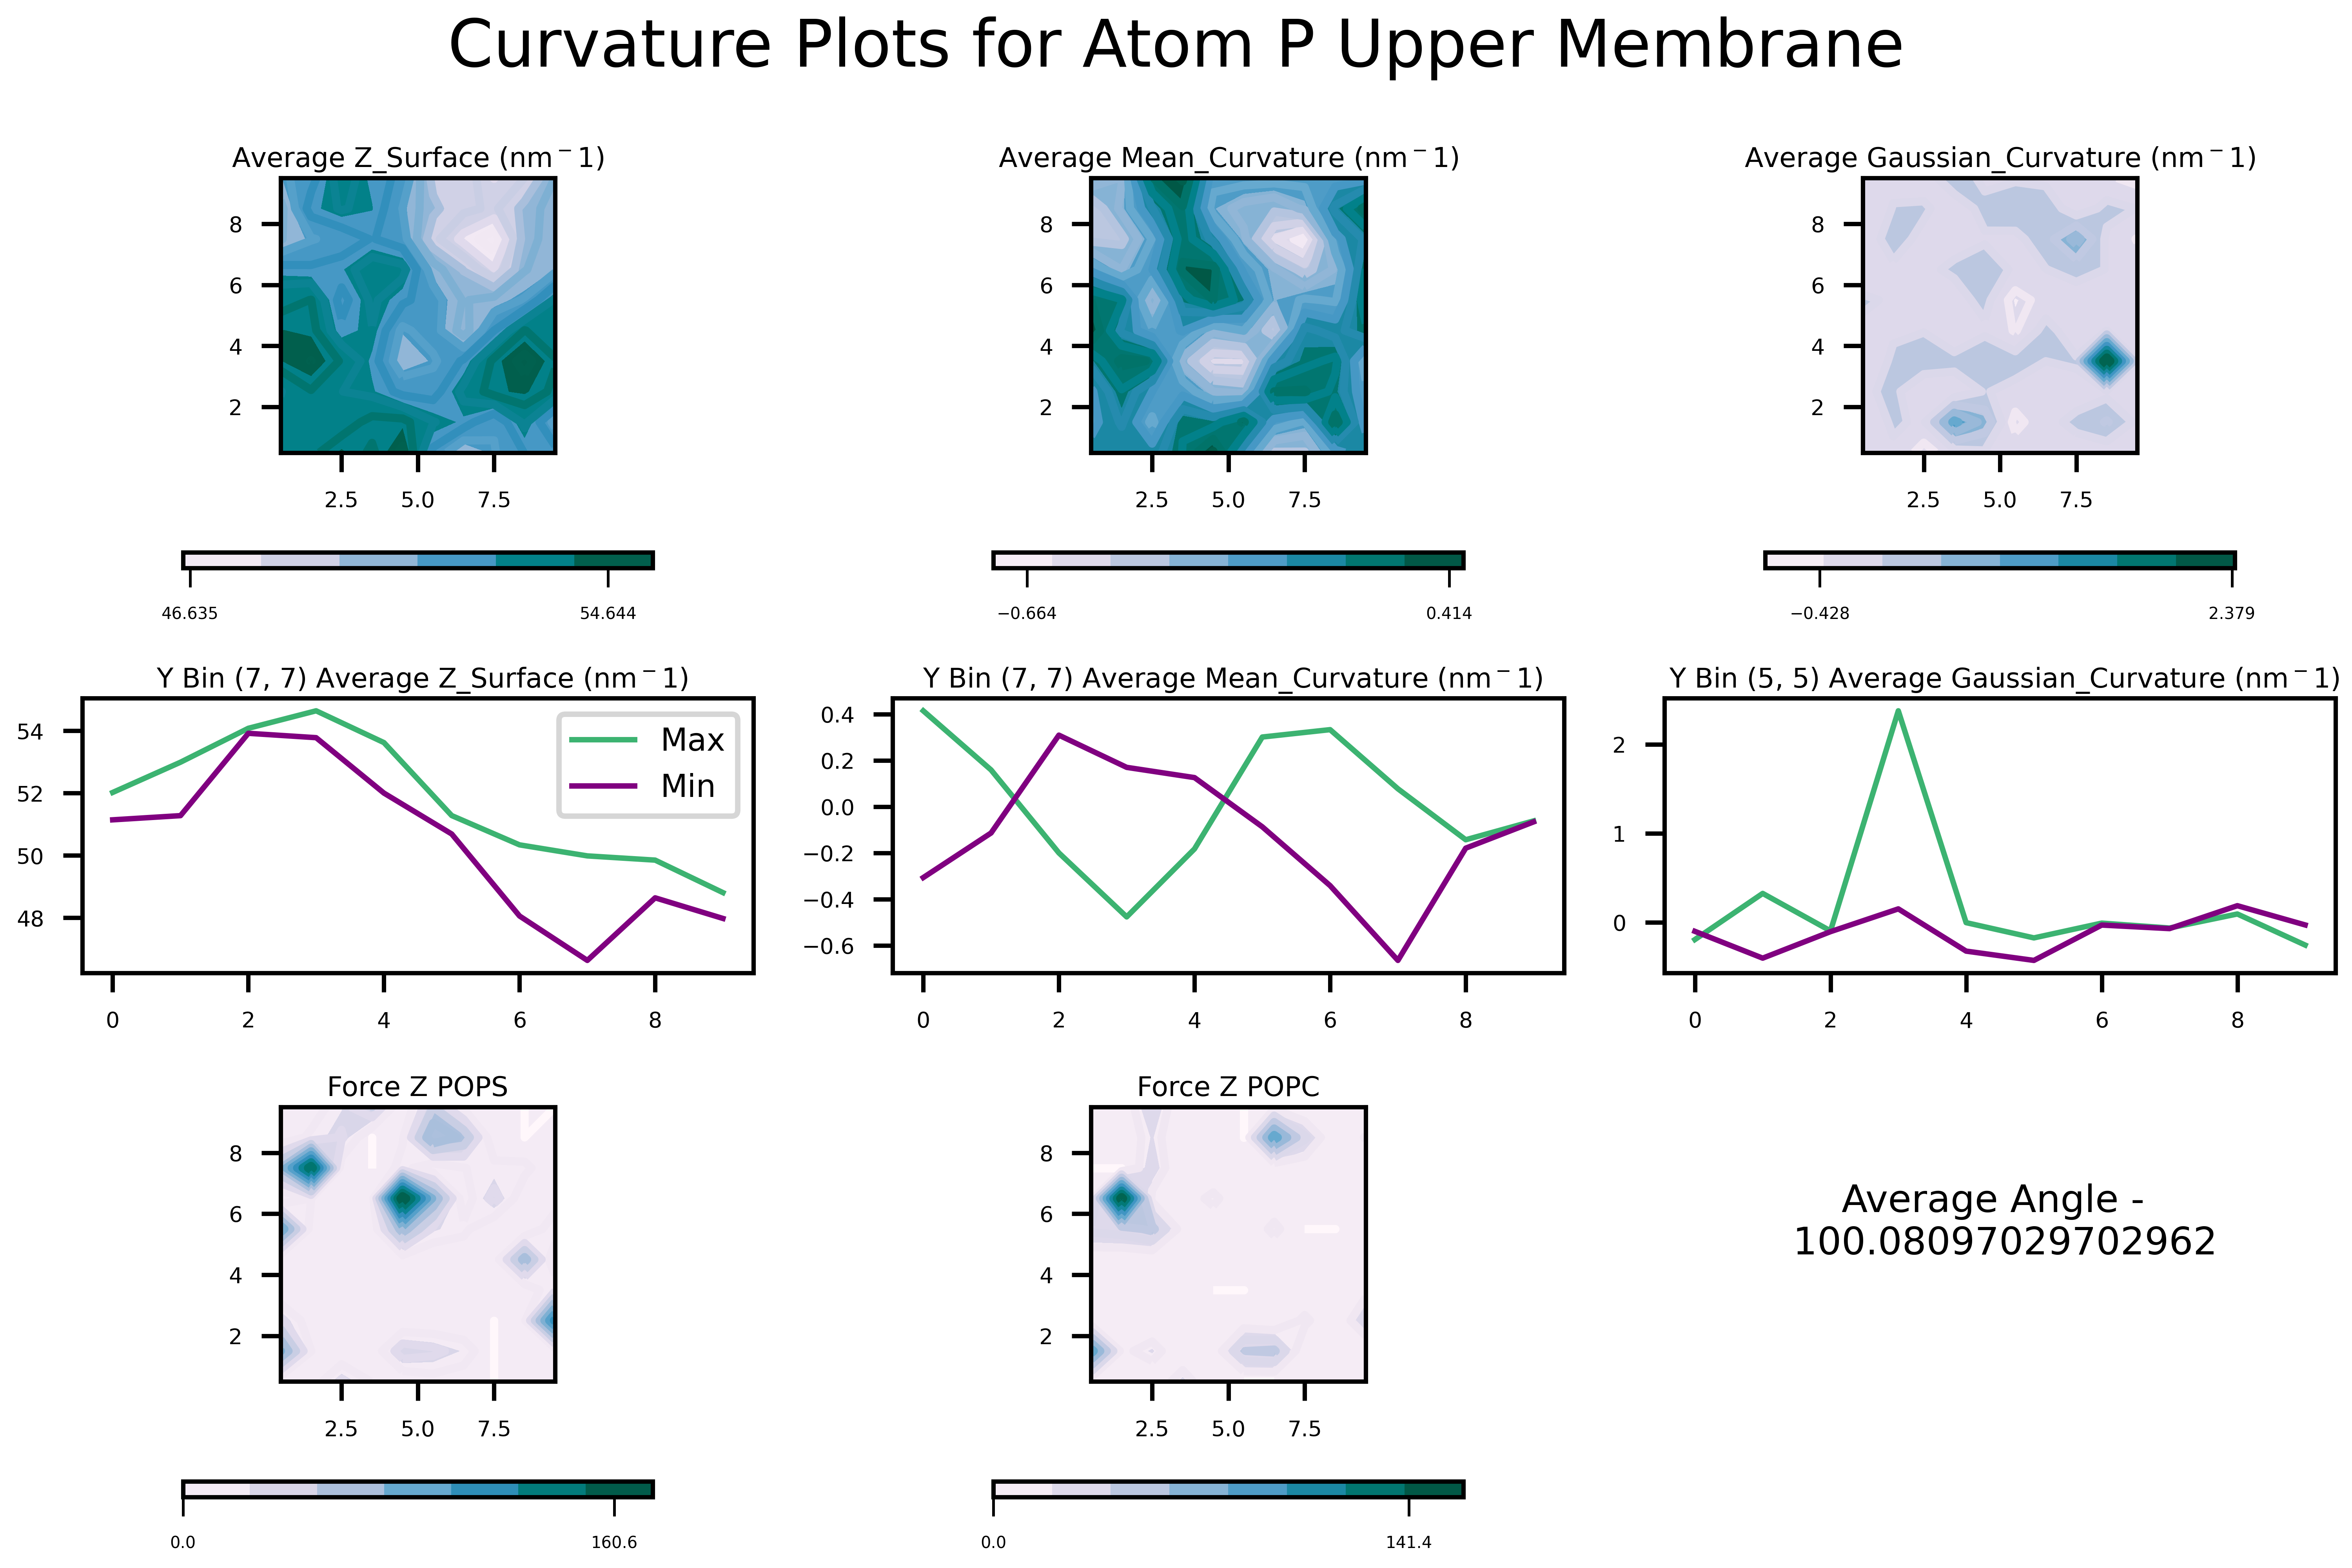

In [10]:
img = Image.open('example_run/curvature_averaged_10_10_P_Upper.png')
img.show()

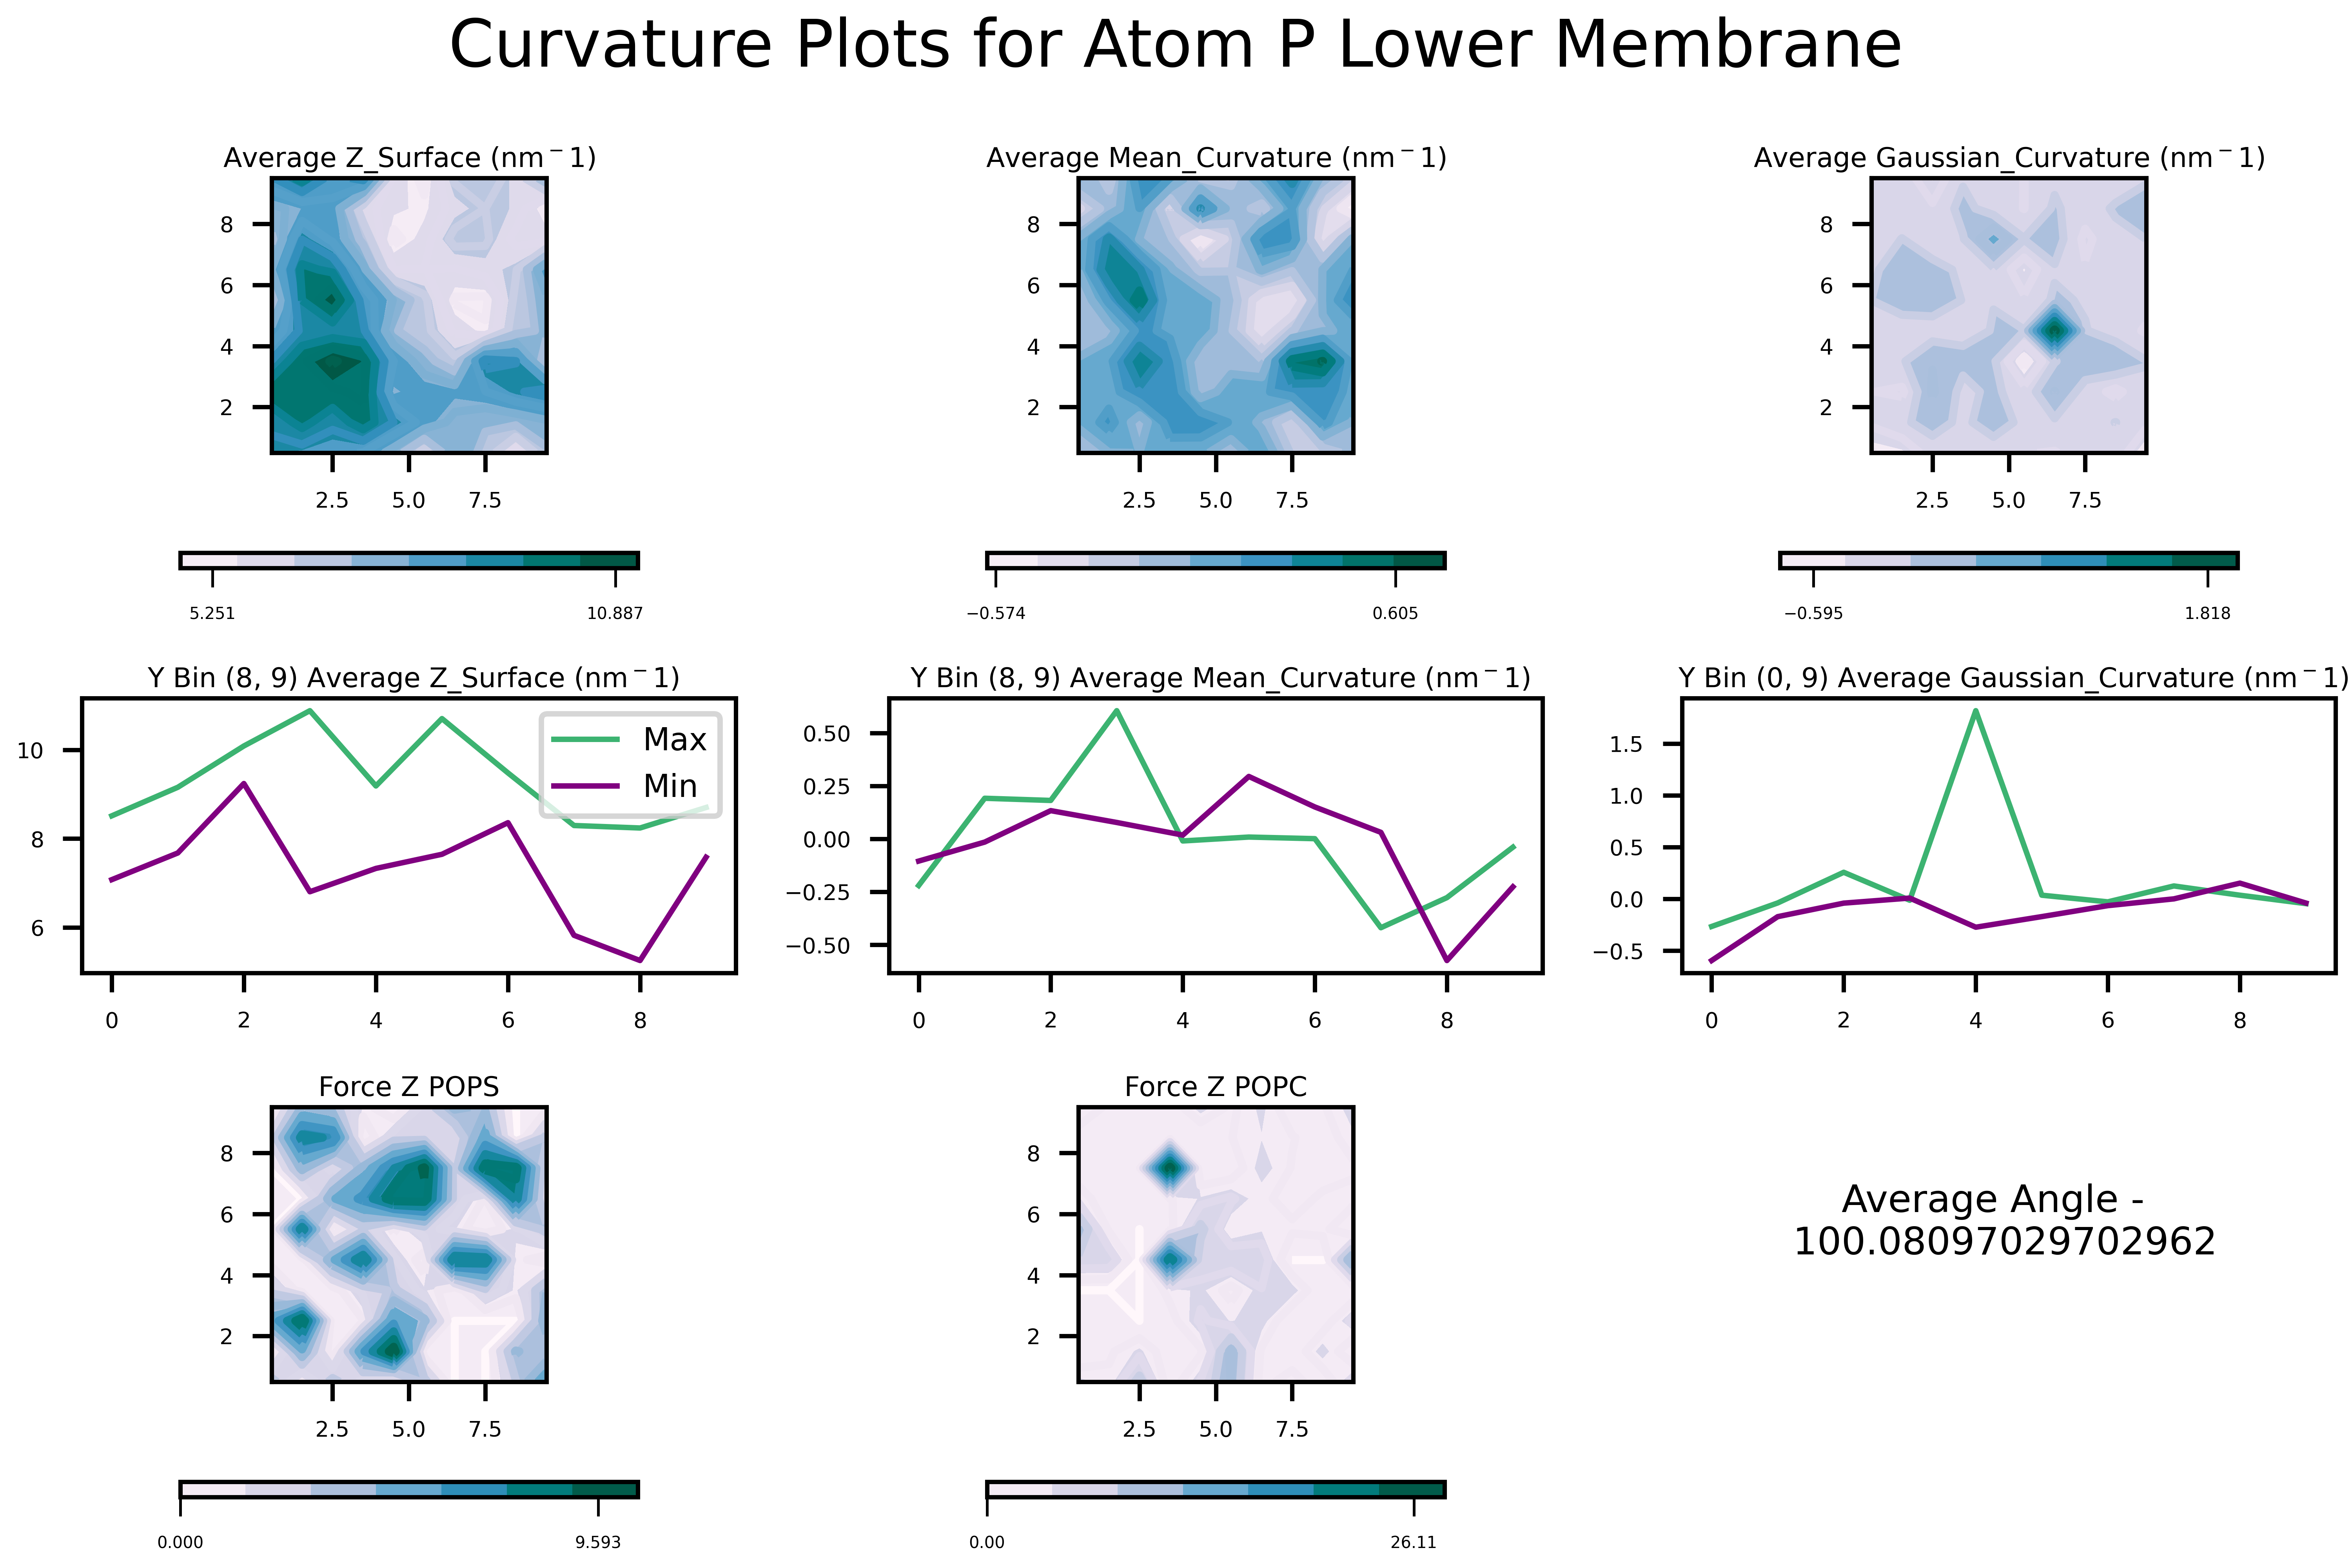

In [11]:
img = Image.open('example_run/curvature_averaged_10_10_P_Lower.png')
img.show()

# Cluster 
This function clusters the selected residues. \
\
Arguments:
 - `attached_ligands`: (str) Ligand 1 to be clustered. default: group 1 previously selected("POPS" in this example).
 - `lipids_to_cluster`: (str) Ligand 2 to be clustered. default: group 2 previously selected("POPC" in this example).
 - `protein_residue_names`: (list) All residues except for attached_ligands and lipids_to_cluster.
 - `box_side_length`: (int) Length of a box size. default: 6.

In [12]:
experiment.cluster()

Making clutering plots


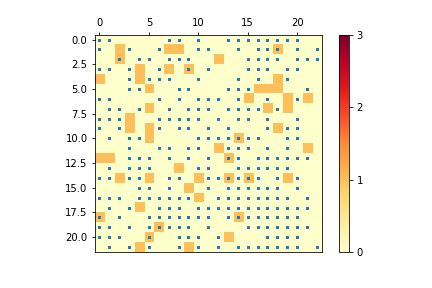

In [13]:
img = Image.open('example_run/cluster_POPC_POPS.png')
img.show()

# Force 
This function calculates the pairwise force between selected groups 1 and 2. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.

In [14]:
experiment.force_graph()

Creating average force plot
Average Force plots created and saved


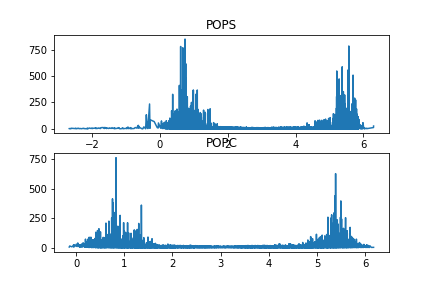

In [15]:
img = Image.open("example_run/force_averaged_['POPS', 'POPC'].png")
img.show()

# MSD and Diffusion
This function calculates MSD values and calculates the diffusion coefficient using MDAnalyses.

In [16]:
experiment.msd()

MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation


Calculating diffusion coefficient


MDAnalysis.analysis.base: INFO     Finishing up


Diffution coefficient and MSD plotted


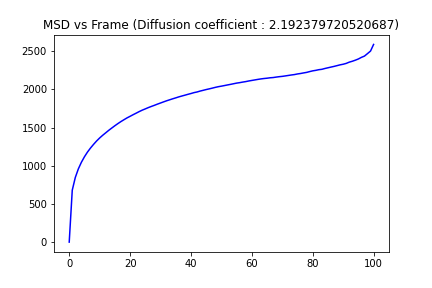

In [17]:
img = Image.open("example_run/MSD.png")
img.show()

# Framewise parsing of PFA
This section illustrates how to generate framewise and moving window plots.

In [18]:
#The .pfa file created, is parsed asframewise.
experiment.framewise = True
experiment.parse_pfa(file_name="generated_pfa_framewise.pfa")

Parsing PFA file as framewise
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/L-FDA/example_run/generated_pfa_framewise.pfa created with 106628 atoms in 788.7984557151794 seconds
PFA file parsed in 25.96916151046753 seconds


In [19]:
#using this function in "average" mode automatically sets "experiment.framewise" to "True".
experiment.parse_parsed_pfa(file_name="example_run/generated_pfa_framewise.pfa", mode="framewise", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

Loading Framewise parsed PFA file
PFA file parsed in 29.857673406600952 seconds


In [20]:
#create curvature plots for the 50th frame
experiment.curvature(specific_frame=50)

Creating 50 specific frame curvature plot


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up


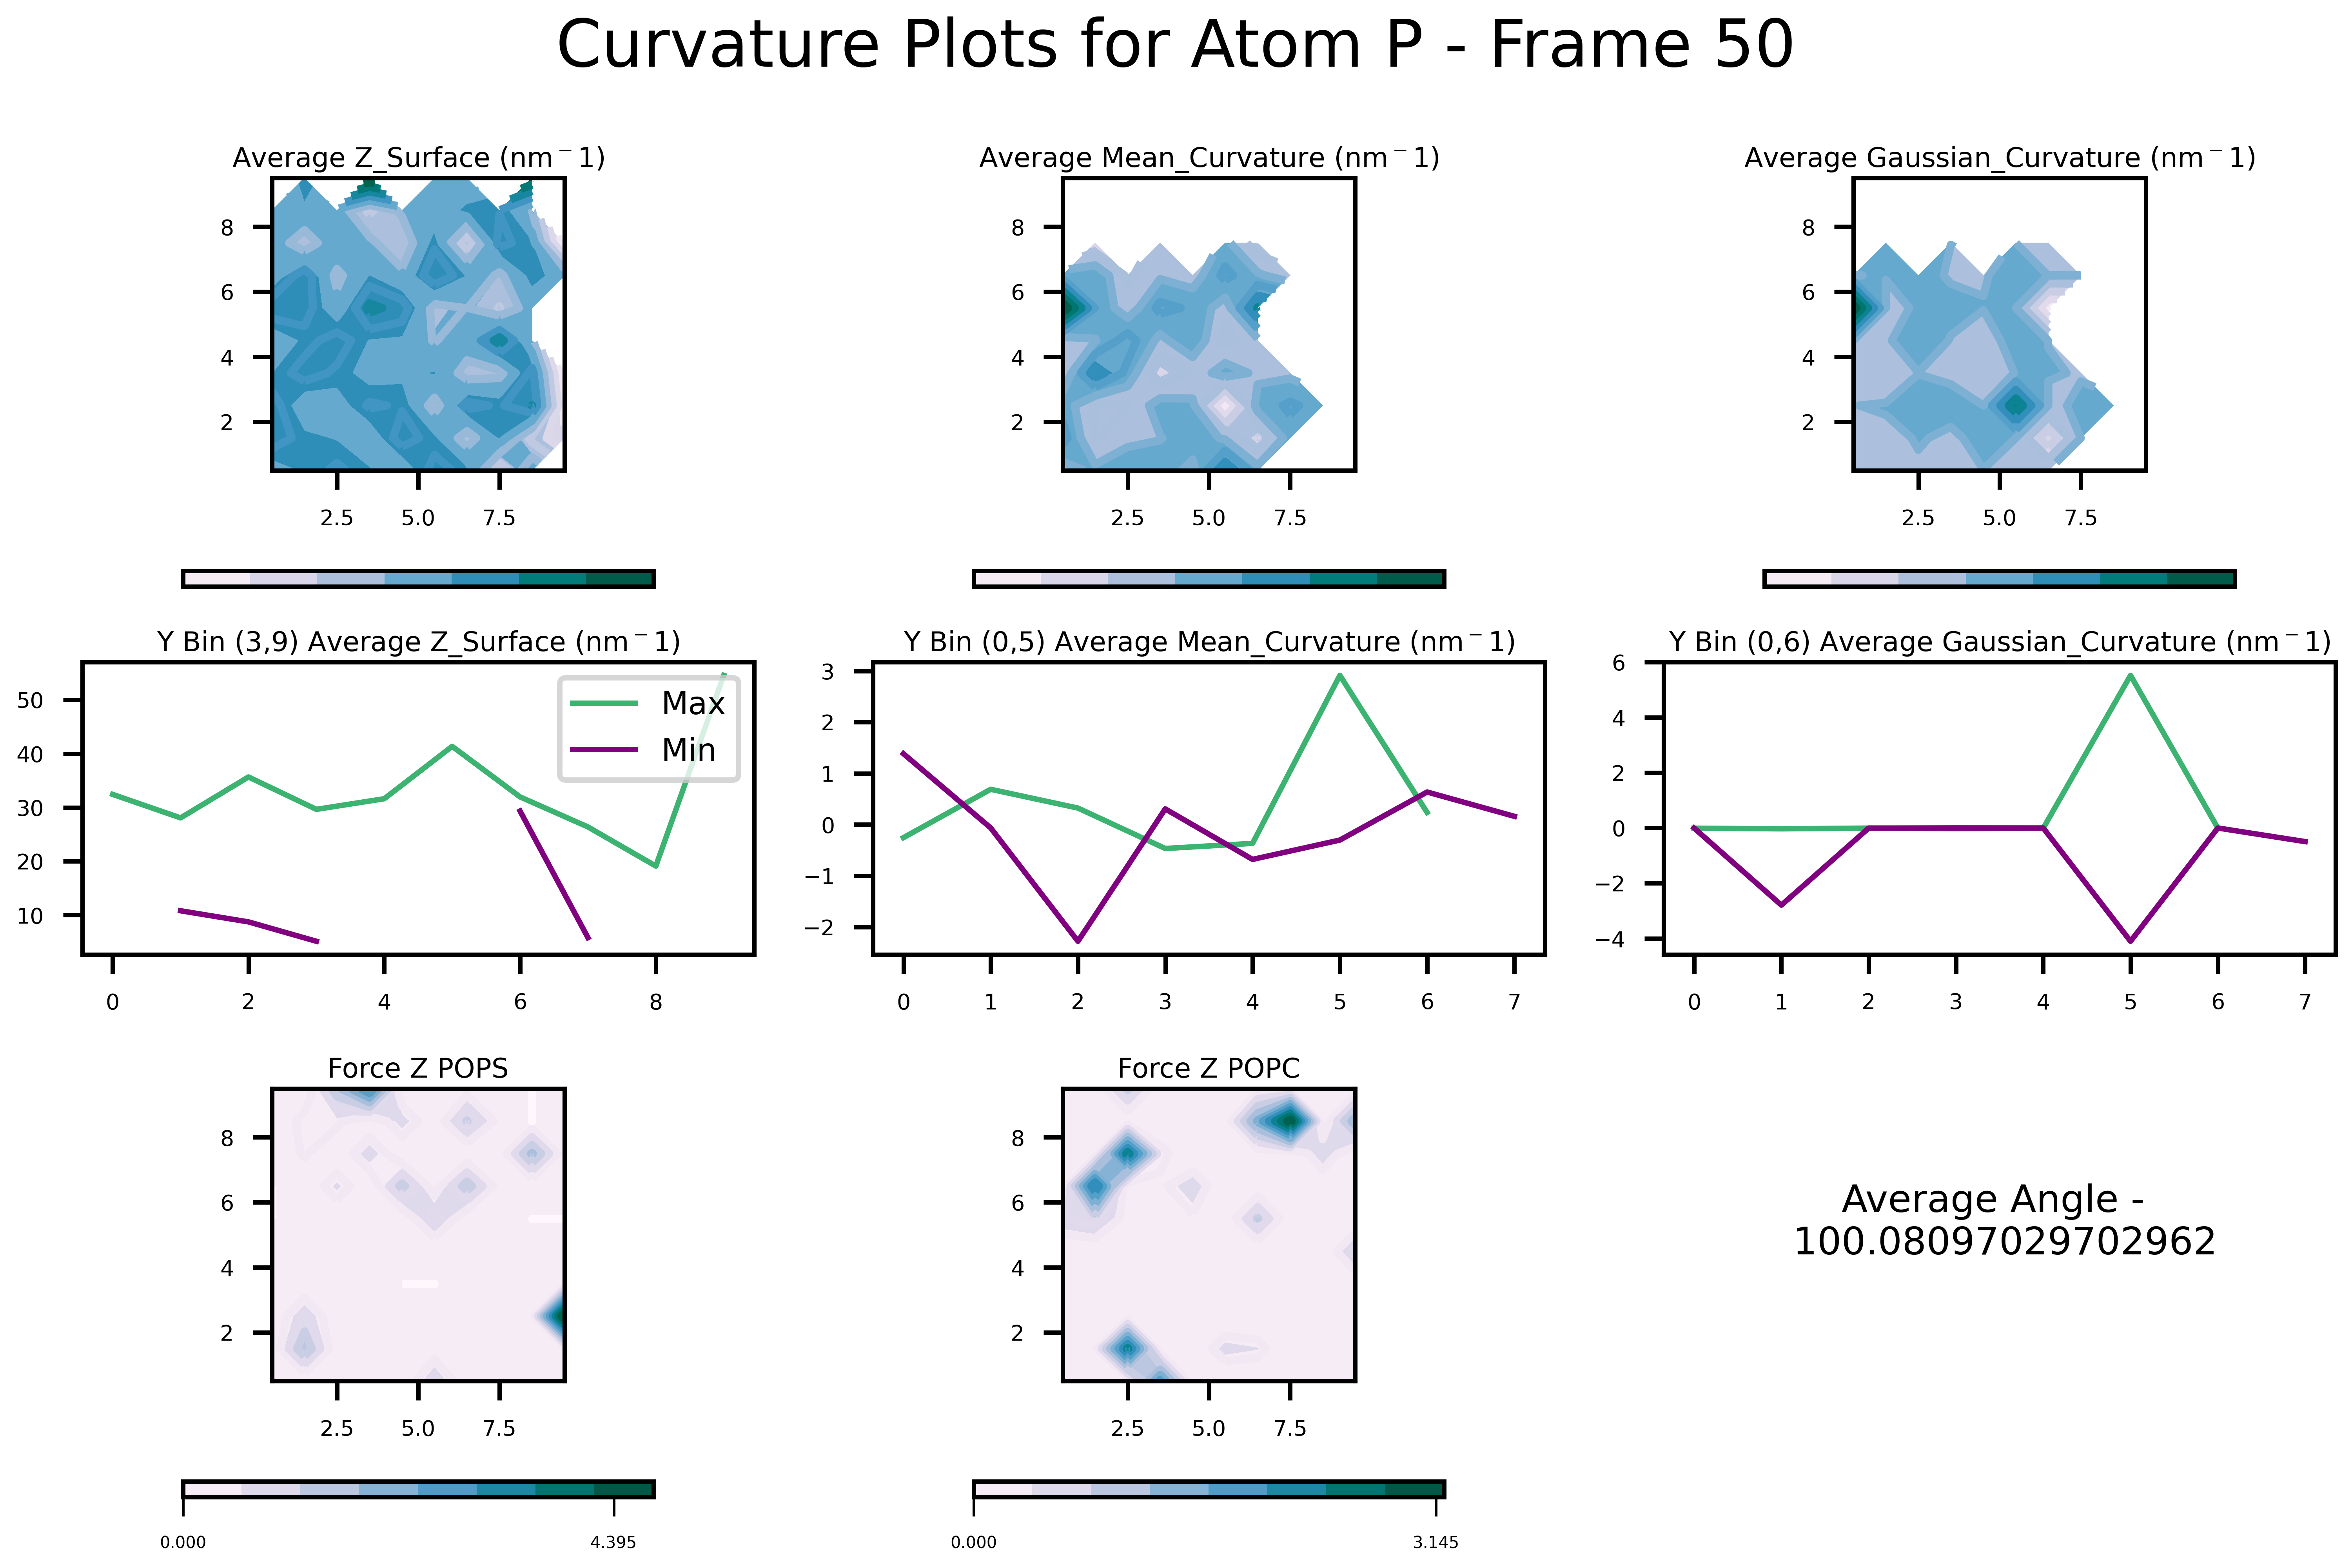

In [21]:
#visualise the plots
img = Image.open("example_run/curvature_framewise_10_10_P_50.png")
img.show()

In [25]:
#create curvature plots for a moving window of size 20. Plots created are for the windows 0-20, 20-40, 40-60, 60-80 and 80-100 for our case.
experiment.curvature(window=20)

Creating 20 window size curvature plots


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up


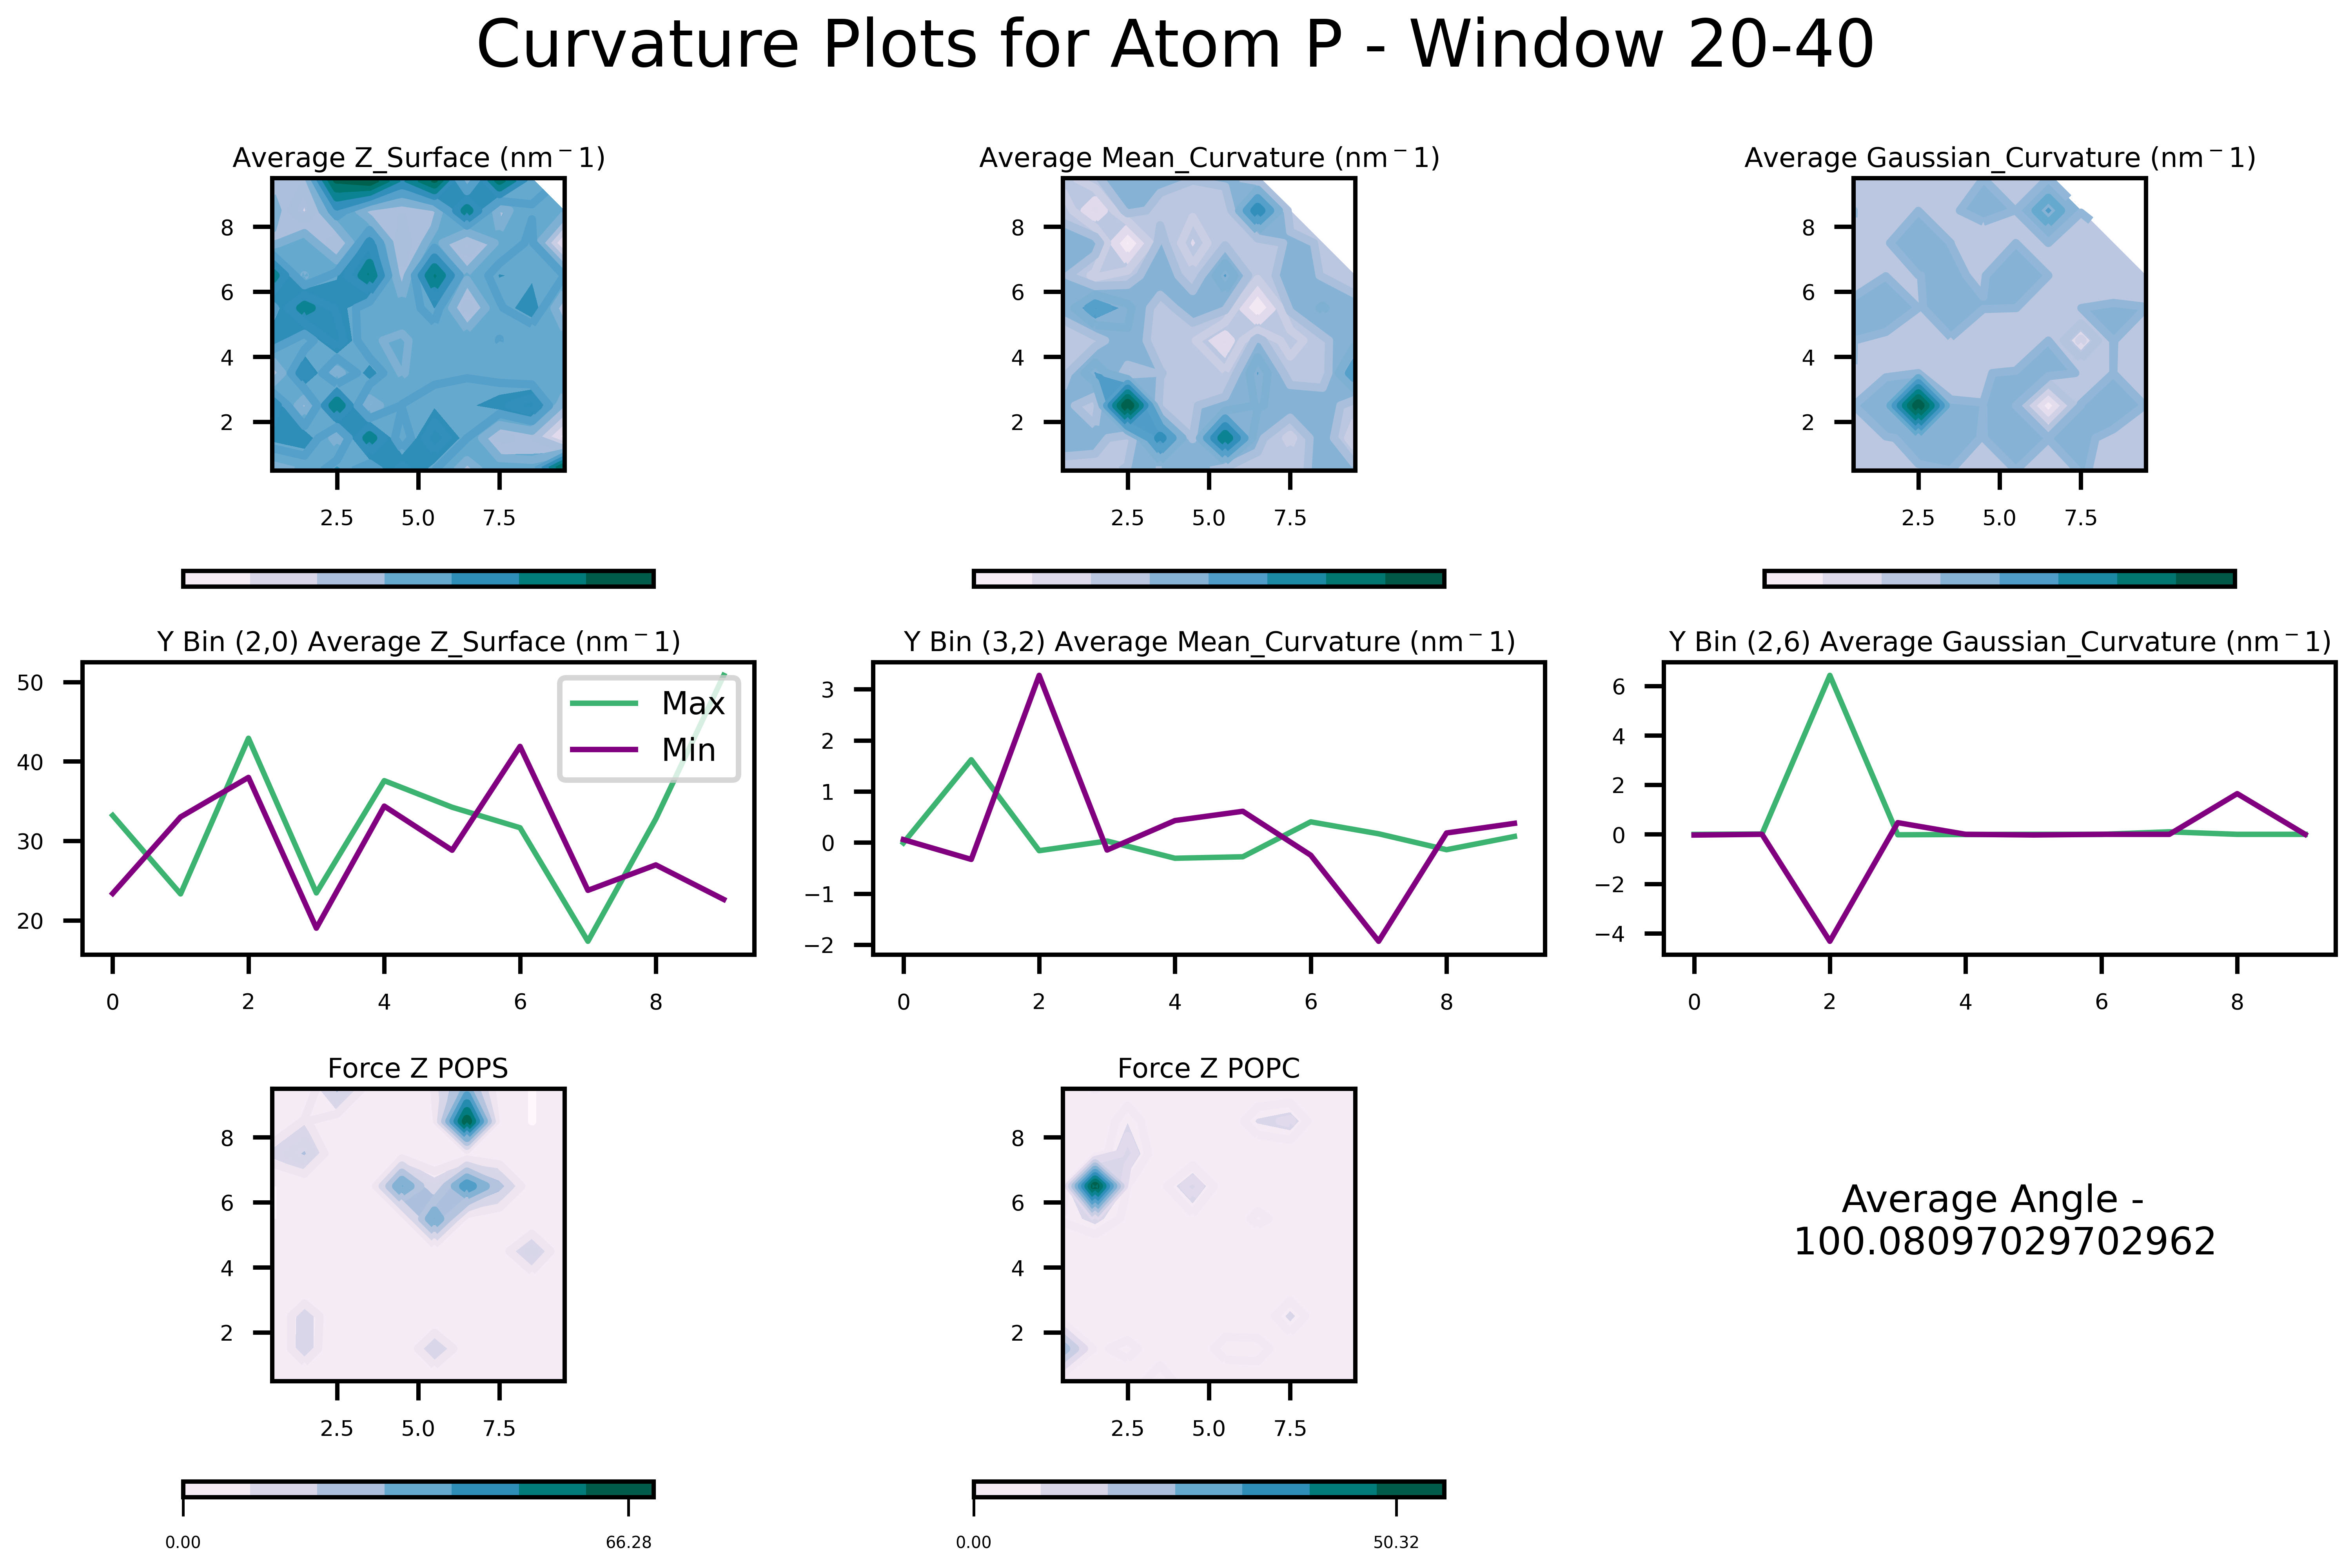

In [26]:
img = Image.open("example_run/curvature_moving_window_10_10_P_window_20_40.png")
img.show()

In [22]:
#create force plots for the 50th frame
experiment.force_graph(specific_frame=50)

Creating framewise average force plot
Force plots created and saved for frame - 50


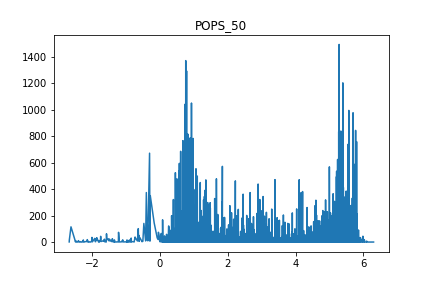

In [23]:
#visualise the plots
img = Image.open("example_run/force_specific_frame_POPS_50.png")
img.show()

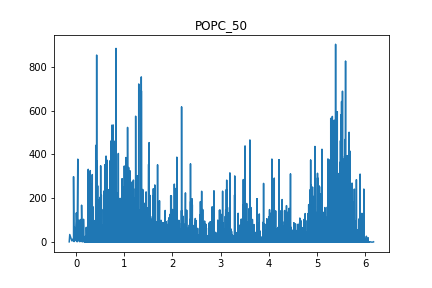

In [24]:
img = Image.open("example_run/force_specific_frame_POPC_50.png")
img.show()

In [27]:
#create force plots for a moving window of size 20.
experiment.force_graph(window=20)

Creating framewise average force plot
Force plots created and saved for moving window of size - 20


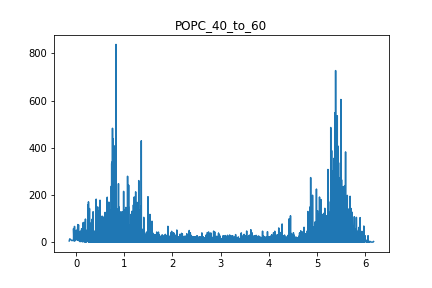

In [28]:
img = Image.open("example_run/force_moving_window_POPC_40_to_60.png")
img.show()

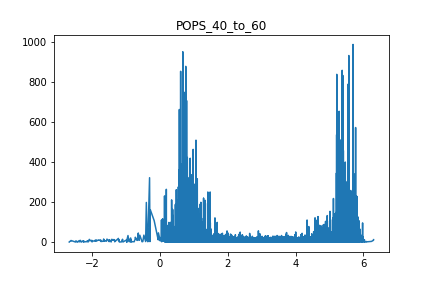

In [29]:
img = Image.open("example_run/force_moving_window_POPS_40_to_60.png")
img.show()

In [30]:
#Create new PDB files with bFactor Loaded.
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_combined", mode="combined")

Loading a new PDB file with bFactor
PDB with BFactor values created in 17.13956379890442 seconds


In [31]:
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_atomwise", mode="atomwise")

Loading a new PDB file with bFactor
PDB with BFactor values created in 17.10803246498108 seconds
